In [1]:
from amadeusgpt.main import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

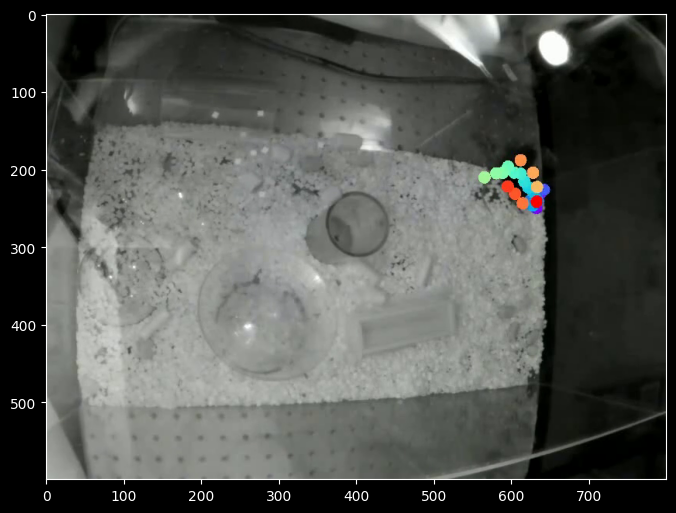

In [6]:
scene_frame_number = 400
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/MausHaus_template.yaml")

config['video_info']['scene_frame_number'] = scene_frame_number
config['keypoint_info']['keypoint_file_path'] = str(amadeus_root / config['keypoint_info']['keypoint_file_path'])
config['video_info']['video_file_path'] = str(amadeus_root / config['video_info']['video_file_path'])

video_path = config['video_info']['video_file_path'] 


cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, scene_frame_number)
    # Read the frame
    ret, image = cap.read()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()
plt.imshow(image)
    

In [7]:
amadeus = AMADEUS(config)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.01 $
current total tokens 1111
The image shows a top-down view of a small enclosure with bedding material. There are various objects within the enclosure, including a circular dish, a cylindrical container, and a rectangular object. There is a cluster of colored dots in the upper right corner, which likely represents tracking markers on an animal.

Based on the context and the presence of tracking markers, it is reasonable to infer that the animal is a mouse.

Here is the filled json string:

```json
{
    "description": "Top-down view of an enclosure with bedding material, a circular dish, a cylindrical container, and a rectangular object. There is a cluster of colored dots in the upper right corner, likely representing tracking markers on an animal.",
    "individuals": 1,
    "species": "topview_mouse",
    "background_objects": ["circular dish", "cylindrical container", "rectangular object"]
}
```


In [8]:
from IPython.display import Markdown, display
from IPython.display import Video
def parse_result(amadeus, qa_message):
    display(Markdown(qa_message['chain_of_thought']))
    sandbox = amadeus.sandbox
    qa_message = sandbox.code_execution(qa_message)
    sandbox.render_qa_message(qa_message)
    print ('after executing the function')
    display(qa_message['meta_info'])
    print (f'videos generated to {qa_message["out_videos"]}')
    print ('Open it with media player if it does not properly display in the notebook')
    if qa_message['out_videos'] is not None:
        for video_path in qa_message['out_videos']:

            display(Video(video_path, embed=True))

    display(Markdown(str(qa_message['function_rets'])))

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.03 $
current total tokens 4275


To plot the trajectory of the animal using the animal center and color it by time, we can use the keypoints data provided by the `get_keypoints` function. Specifically, we will focus on the 'mouse_center' keypoint to represent the animal's center. 

We will follow these steps:
1. Retrieve the keypoints data.
2. Extract the coordinates of the 'mouse_center' keypoint for all frames.
3. Plot the trajectory of the 'mouse_center' keypoint, coloring the trajectory by time.

Let's proceed with the code:

```python
def plot_animal_trajectory(config: Config):
    """
    Plot the trajectory of the animal using the animal center and color it by time.

    Parameters:
    ----------
    config: Config
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Get keypoints data
    keypoints = analysis.get_keypoints()  # shape: (n_frames, n_individuals, n_kpts, n_dims)
    
    # Get the number of frames
    n_frames = analysis.get_data_length()
    
    # Get the index of the 'mouse_center' keypoint
    keypoint_names = analysis.get_keypoint_names()
    mouse_center_index = keypoint_names.index('mouse_center')
    
    # Extract the coordinates of the 'mouse_center' keypoint for all frames
    mouse_center_coords = keypoints[:, 0, mouse_center_index, :]  # shape: (n_frames, 2)
    
    # Create a time array for coloring
    time = np.arange(n_frames)
    
    # Plot the trajectory
    fig, ax = plt.subplots()
    scatter = ax.scatter(mouse_center_coords[:, 0], mouse_center_coords[:, 1], c=time, cmap='viridis')
    ax.invert_yaxis()  # Invert y-axis to match image coordinates
    ax.set_xlim(0, 800)
    ax.set_ylim(600, 0)
    ax.set_title('Animal Trajectory Colored by Time')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    fig.colorbar(scatter, ax=ax, label='Time (frames)')
    
    return fig, ax
```

### Explanation:
1. **Retrieve Keypoints Data**: We use the `get_keypoints` function to get the keypoints data, which has the shape `(n_frames, n_individuals, n_kpts, n_dims)`.
2. **Extract 'mouse_center' Coordinates**: We find the index of the 'mouse_center' keypoint and extract its coordinates for all frames.
3. **Create Time Array**: We create a time array to use for coloring the trajectory.
4. **Plot Trajectory**: We plot the trajectory of the 'mouse_center' keypoint, coloring it by time. We invert the y-axis to match the image coordinates and set the x and y limits to cover the whole image.

This function will plot the trajectory of the animal's center and color it by time, providing a visual representation of the animal's movement over time.

after executing the function


{'description': 'Top-down view of an enclosure with bedding material, a circular dish, a cylindrical container, and a rectangular object. There is a cluster of colored dots in the upper right corner, likely representing tracking markers on an animal.',
 'individuals': 1,
 'species': 'topview_mouse',
 'background_objects': ['circular dish',
  'cylindrical container',
  'rectangular object']}

None


(<Figure size 800x800 with 2 Axes>, <Axes: title={'center': 'Animal Trajectory Colored by Time'}, xlabel='X Coordinate', ylabel='Y Coordinate'>)

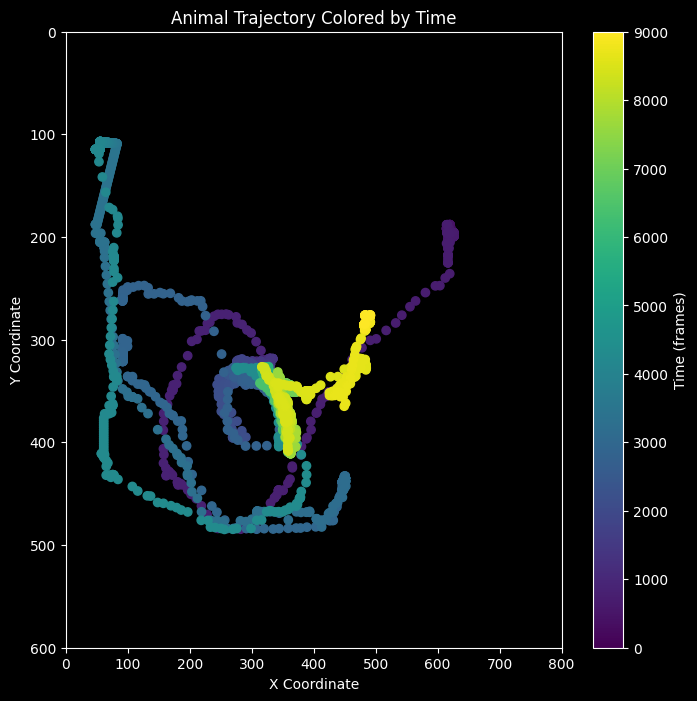

In [9]:
query = "Plot the trajectory of the animal using the animal center and color it by time"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)

HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.05 $
current total tokens 6802


To generate an occupancy plot using the animal center, we need to follow these steps:

1. Retrieve the keypoints data using the `get_keypoints()` method.
2. Extract the coordinates of the animal center keypoint.
3. Create a 2D histogram (occupancy plot) of the animal center coordinates.

Given the information provided, we can accurately answer the query using the available core APIs. Let's proceed to write the code.

Here is the function to generate the occupancy plot:

```python
def get_occupancy_plot(config: Config):
    """
    Generate an occupancy plot using the animal center keypoint.

    Parameters:
    ----------
    config: Config
        Configuration object for the analysis.
    
    Returns:
    -------
    tuple
        A tuple containing the figure and axes of the plot.
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Retrieve keypoints data
    keypoints = analysis.get_keypoints()
    
    # Extract the coordinates of the animal center keypoint (assuming 'mouse_center' is the center)
    # The shape of keypoints is (n_frames, n_individuals, n_kpts, n_dims)
    center_index = analysis.get_keypoint_names().index('mouse_center')
    center_coords = keypoints[:, :, center_index, :2]  # Extract x and y coordinates
    
    # Flatten the coordinates for all frames and individuals
    x_coords = center_coords[:, :, 0].flatten()
    y_coords = center_coords[:, :, 1].flatten()
    
    # Create a 2D histogram (occupancy plot)
    fig, ax = plt.subplots()
    ax.hist2d(x_coords, y_coords, bins=50, cmap='Blues')
    
    # Invert y-axis to match the image coordinates
    ax.invert_yaxis()
    
    # Set plot limits to cover the whole image
    ax.set_xlim(0, 1280)
    ax.set_ylim(0, 1024)
    
    ax.set_title('Occupancy Plot using Animal Center')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    
    return fig, ax
```

This function will generate an occupancy plot using the animal center keypoint and return the figure and axes objects for further manipulation or display.

after executing the function


{'description': 'A single mouse viewed from the top in an enclosed space with a light-colored floor and darker walls. There are some objects on the left side of the image, including a syringe and other equipment.',
 'individuals': 1,
 'species': 'topview_mouse',
 'background_objects': ['syringe', 'equipment']}

None


(<Figure size 800x800 with 1 Axes>, <Axes: title={'center': 'Occupancy Plot using Animal Center'}, xlabel='X Coordinate', ylabel='Y Coordinate'>)

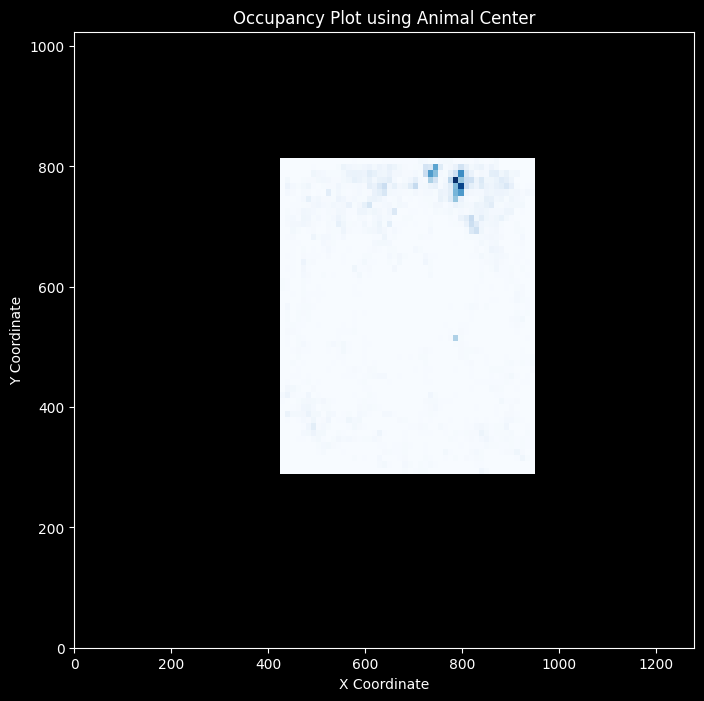

In [6]:
query = "give me the occupancy plot using the animal center"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)